In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import svm

In [230]:
df = pd.read_csv("loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [231]:
print(df.shape)
print(df.isnull().sum()) # checking the presence of null value records

(614, 13)
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [232]:
df.loc[df.duplicated()] # checking if there is any duplicate value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [233]:
df1=df.drop(["Loan_ID"],axis=1) # dropping the loanid column
df1.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [234]:
print(df1.dtypes) # checking the column datatypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [235]:
# splitting the categorical and numerical variables 
cat_data = [] 
num_data = []

for i,c in enumerate(df1.dtypes):
    if c == object:
        cat_data.append(df1.iloc[:, i])
    else :
        num_data.append(df1.iloc[:, i])

In [237]:
#changing as dataframe
cat_data = pd.DataFrame(cat_data).transpose() 
num_data = pd.DataFrame(num_data).transpose()


In [238]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [239]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [240]:
# filling the null value with most occurred data
cat_data = cat_data.apply(lambda x : x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [242]:
# filling the null value with next record data
num_data.fillna(method = "bfill",inplace = True)
num_data.isnull().sum().any()

False

In [ ]:
cat_data_1.isnull().sum()

In [ ]:
num_data.isnull().sum()

In [243]:
target_values = {'Y': 0 , 'N' : 1}

cat_target = cat_data['Loan_Status'] # storting the class variable in separate dataframe

cat_data_1=cat_data.drop(["Loan_Status"],axis = 1) # dropping the class variable from main daframe

cat_target_1 = target_cat.map(target_values) # converting the categorical class label into numerical data

print(cat_target_1)

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64


In [245]:
#converting the categorical feature into numerical feature
le = LabelEncoder()
for i in cat_data_1:
    cat_data_1[i] = le.fit_transform(cat_data_1[i])

In [223]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2


In [250]:
df2 = pd.concat([cat_data_1,num_data,cat_target_1],axis = 1) # joining the categrical,numerical and class dataset into single dataset
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,Y
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,N
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,Y
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,Y
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,Y


In [252]:
# splitting the concatenated dataframe into x and y
y = df2['Loan_Status']
x = df2.drop(["Loan_Status"],axis = 1)

In [253]:
len(y)

614

In [254]:
len(x)

614

In [255]:
df2.describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,1.037459,5403.459283,1621.245798,146.416938,342.410423,0.84202
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.787482,6109.041673,2926.248369,84.917398,64.428629,0.36502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.00000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.00000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.00000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,5795.000000,2297.250000,166.750000,360.000000,1.00000
max,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.00000


In [260]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [266]:
print(len(x_train),len(x_test))

429 185


In [267]:
model=make_pipeline(StandardScaler(), LogisticRegression())

In [278]:
model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [279]:
model.score(X_test, y_test)

0.7837837837837838

In [270]:
y_predicted = model.predict(x_test)
y_predicted[:15]

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y'], dtype=object)

In [280]:
cm = confusion_matrix(y_test,y_predicted)
cm 

array([[ 29,  36],
       [  4, 116]], dtype=int64)

Text(42.0, 0.5, 'Truth')

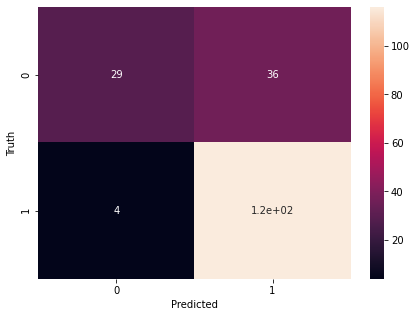

In [282]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [291]:

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'tree' : {
        'model' : DecisionTreeClassifier(),
        'params' :{   
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [292]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,random_forest,0.766840,{'n_estimators': 10}
1,svm,0.750588,"{'C': 10, 'kernel': 'linear'}"
2,tree,0.720219,{}
3,logistic_regression,0.804159,{'C': 1}


### Conclusion:
#### From the above table, we can conclude that logistic regression  giving higher accuracy!!!